In [1]:
import warnings
warnings.filterwarnings("ignore")

from pymatgen.ext.matproj import MPRester
from pyxtal import pyxtal

mpr = MPRester('fn8WQGgT9rvZAh6H') # insert your keys here


In [2]:
# define your search criteria
criteria ={
           "spacegroup.number": 230,
           "nsites": {"$lt": 100},
          }

#choose the properties which you are interested:
properties = [
              "material_id",
              "icsd_ids",
              "structure",
              "spacegroup.number",
              #"cif",
             ]
entries = mpr.query(criteria=criteria, properties=properties)

# Seperate the entries based on ICSD 
entries_icsd = []
entries_non_icsd = []
for entry in entries:
    if len(entry['icsd_ids'])>0:
        entries_icsd.append(entry)
    else:
        entries_non_icsd.append(entry)

print("Total:", len(entries))
print("ICSD:", len(entries_icsd))
print("Non-ICSD:", len(entries_non_icsd))

Total: 325
ICSD: 91
Non-ICSD: 234


O96Cd24Ge24Sc16 Ia-3d 230
 12.6476,  12.6476,  12.6476,  90.0000,  90.0000,  90.0000, cubic


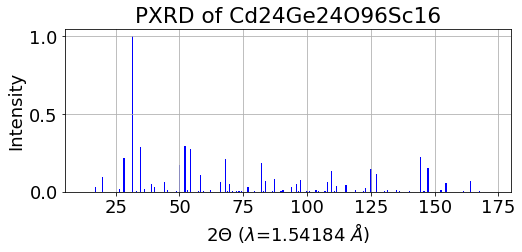

O96Sr24Al16Si24 Ia-3d 230
 12.2758,  12.2758,  12.2758,  90.0000,  90.0000,  90.0000, cubic


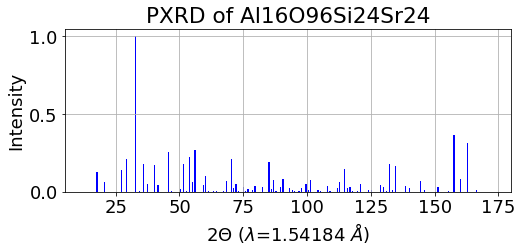

O96Cr16Mn24Si24 Ia-3d 230
 11.9361,  11.9361,  11.9361,  90.0000,  90.0000,  90.0000, cubic


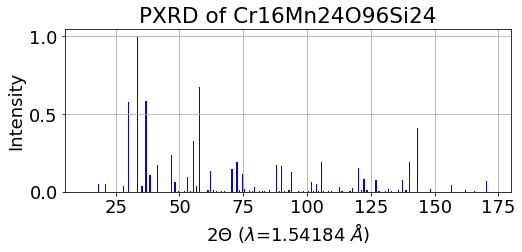

Na24Li24F96In16 Ia-3d 230
 12.8960,  12.8960,  12.8960,  90.0000,  90.0000,  90.0000, cubic


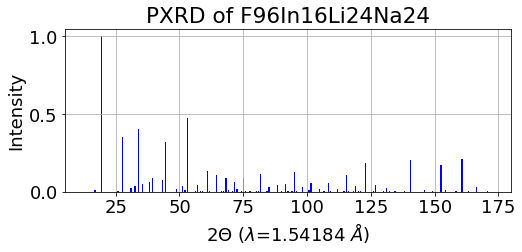

Na24As24Fe16O96 Ia-3d 230
 12.4262,  12.4262,  12.4262,  90.0000,  90.0000,  90.0000, cubic


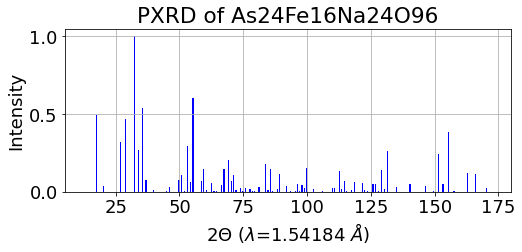

In [3]:
# Plot the PXRD for a few selected structures
for entry in entries_icsd[:5]:
    pmg = entry['structure']
    id = entry['material_id']
    s1 = pyxtal()
    s1.from_seed(pmg, tol=1e-3)
    print(s1.formula, s1.group.symbol, s1.group.number)
    print(s1.lattice)

    xrd = s1.get_XRD(thetas=[0, 180])
    xrd.plot_pxrd(fontsize=18, figsize=(8,3), show_hkl=False, xlim=[5,180], width=0.5, minimum_I=0.01)
    #two theta angles and intensity can be accessed via the following 
    #xrd.theta2
    #xrd.xrd_intensity
    

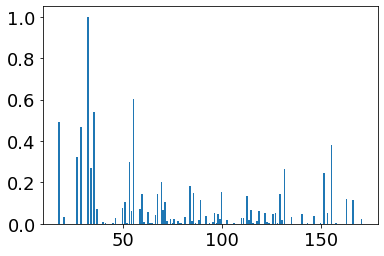

In [4]:
# A quick way to extract data and make the pxrd plot
import matplotlib.pyplot as plt
plt.bar(xrd.theta2, xrd.xrd_intensity/max(xrd.xrd_intensity))
plt.show()

mp-3731 mp-552588
  5.2230,   5.2230,  14.1292,  90.0000,  90.0000, 120.0000, hexagonal R3c


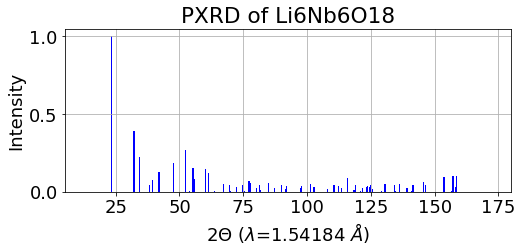

  5.2694,   5.2694,  13.9031,  90.0000,  90.0000, 120.0000, hexagonal R-3c


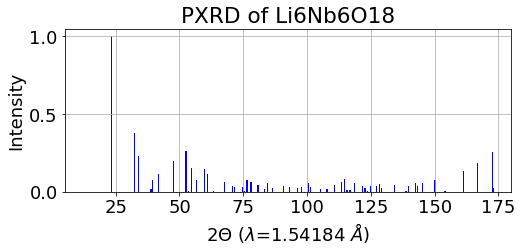

mp-7375 mp-935811
  5.7739,   5.7739,   7.1092,  90.0000,  90.0000, 120.0000, hexagonal R3m


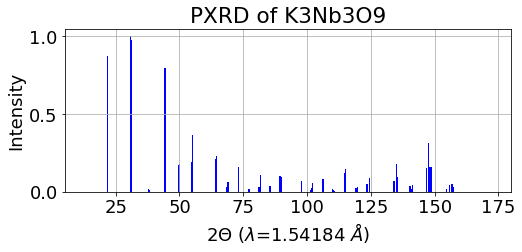

  4.0575,   4.0575,   4.0575,  90.0000,  90.0000,  90.0000, cubic Pm-3m


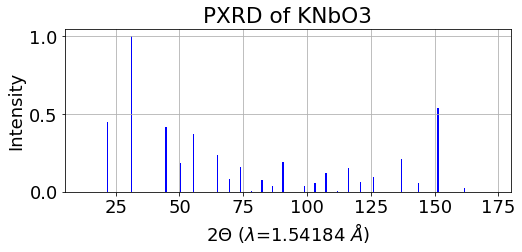

mp-5020 mp-2998
  5.7547,   5.7547,   7.1100,  90.0000,  90.0000, 120.0000, hexagonal R3m


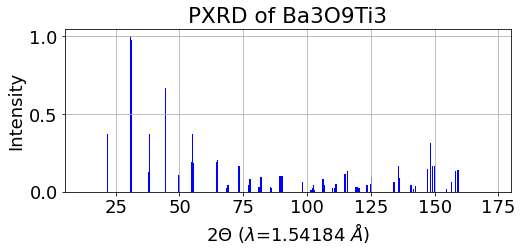

  4.0356,   4.0356,   4.0356,  90.0000,  90.0000,  90.0000, cubic Pm-3m


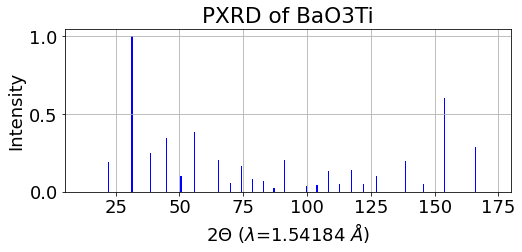

In [5]:
# Plot the PXRD for a few selected structure pairs with symmetry relation

pairs = [
         ('mp-3731', 'mp-552588'), #LiNbO3
         ('mp-7375', 'mp-935811'), #KNbO3
         ('mp-5020', 'mp-2998'),   #BaTiO3
        ]
for pair in pairs:
    (id1, id2) = pair
    print(id1, id2)
    pmg1 = mpr.get_structure_by_material_id(id1, conventional_unit_cell=True)
    pmg2 = mpr.get_structure_by_material_id(id2, conventional_unit_cell=True)
    s1 = pyxtal()
    s1.from_seed(pmg1)
    s2 = pyxtal()
    s2.from_seed(pmg2)
    print(s1.lattice, s1.group.symbol)
    xrd1 = s1.get_XRD(thetas=[0, 180])
    xrd1.plot_pxrd(fontsize=18, figsize=(8,3), show_hkl=False, xlim=[5,180], width=0.5, minimum_I=0.01)
    print(s2.lattice, s2.group.symbol)
    xrd2 = s2.get_XRD(thetas=[0, 180])
    xrd2.plot_pxrd(fontsize=18, figsize=(8,3), show_hkl=False, xlim=[5,180], width=0.5, minimum_I=0.01)